In [1]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV

from data_prep import y_train, y_test, tf_idf_data_train, tf_idf_data_test
from visualizations import confusion_matrix_heat_map

/Users/stevedye/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/stevedye/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


In [2]:
parameters = {'max_depth': [None],
              'n_estimators': [100]}

In [3]:
rf = RandomForestClassifier()
rf_classifier = GridSearchCV(rf, parameters, cv=3, n_jobs= -1)
rf_classifier.fit(tf_idf_data_train, y_train)
print(rf_classifier.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [4]:
rf_train_preds = rf_classifier.predict(tf_idf_data_train)
rf_test_preds = rf_classifier.predict(tf_idf_data_test)

rf_train_score = accuracy_score(y_train, rf_train_preds)
rf_test_score = accuracy_score(y_test, rf_test_preds)

rf_cv_score = cross_val_score(rf_classifier, tf_idf_data_train, y_train, cv=3, scoring="accuracy")

In [5]:
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(rf_train_score, rf_test_score))
print("CV Scores:", rf_cv_score)

Training Accuracy: 0.9984 		 Testing Accuracy: 0.6257
CV Scores: [0.68458781 0.70534648 0.82482079]


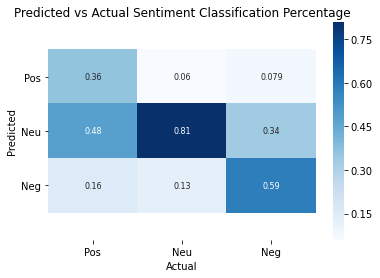

In [6]:
confusion_matrix_heat_map(rf_classifier, tf_idf_data_test, y_test)